In [73]:

import pandas as pd

stock_data = pd.read_csv(
    '/Users/huafa/Downloads/stock_combined.csv')


In [74]:
# fill in na values
stock_data= stock_data.fillna(method='backfill')

# Price_1d, Price_2d, Price_3d
stock_data["price_1d"] = stock_data.btc_close.shift(1)
stock_data["price_2d"] = stock_data.btc_close.shift(2)
stock_data["price_3d"] = stock_data.btc_close.shift(3)

stock_data["nasdaq_1d"] = stock_data.nasdaq_close.shift(1)
stock_data["nasdaq_2d"] = stock_data.nasdaq_close.shift(2)
stock_data["nasdaq_3d"] = stock_data.nasdaq_close.shift(3)

stock_data["sp_1d"] = stock_data.sp_close.shift(1)
stock_data["sp_2d"] = stock_data.sp_close.shift(2)
stock_data["sp_3d"] = stock_data.sp_close.shift(3)

stock_data["dji_1d"] = stock_data.dji_close.shift(1)
stock_data["dji_2d"] = stock_data.dji_close.shift(2)
stock_data["dji_3d"] = stock_data.dji_close.shift(3)


stock_data
#stock_data.to_csv('/Users/zozochunyu/Biostats_Fall23/QMSS5067NLP/Final/output/stock_data_ver2.csv') 


,date,btc_open,btc_close,btc_volume,nasdaq_close,dji_close,sp_close,oil_close,gold_close,price_1d,...,price_3d,nasdaq_1d,nasdaq_2d,nasdaq_3d,sp_1d,sp_2d,sp_3d,dji_1d,dji_2d,dji_3d
0,2021-02-01,33114.578125,33537.175781,61400400660,13403.389648,30211.900391,3773.860107,53.549999,1860.800049,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-02,33533.199219,35510.289063,63088585433,13612.780273,30687.500000,3826.310059,54.759998,1830.500000,33537.175781,...,NaN,13403.389648,NaN,NaN,3773.860107,NaN,NaN,30211.900391,NaN,NaN
2,2021-02-03,35510.820313,37472.089844,61166818159,13610.540039,30723.599609,3830.169922,55.689999,1832.199951,35510.289063,...,NaN,13612.780273,13403.389648,NaN,3826.310059,3773.860107,NaN,30687.500000,30211.900391,NaN
3,2021-02-04,37475.105469,36926.066406,68838074392,13777.740234,31055.900391,3871.739990,56.230000,1788.900024,37472.089844,...,33537.175781,13610.540039,13612.780273,13403.389648,3830.169922,3826.310059,3773.860107,30723.599609,30687.500000,30211.900391
4,2021-02-05,36931.546875,38144.308594,58598066402,13856.299805,31148.199219,3886.830078,56.849998,1810.900024,36926.066406,...,35510.289063,13777.740234,13610.540039,13612.780273,3871.739990,3830.169922,3826.310059,31055.900391,30723.599609,30687.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-01-27,36841.878906,37138.234375,25041426629,13352.780273,34160.800781,4326.509766,86.610001,1793.300049,36852.121094,...,36654.328125,13542.120117,13539.290039,13855.129883,4349.930176,4356.450195,4410.129883,34168.101562,34297.699219,34364.500000
361,2022-01-28,37128.445313,37784.332031,22238830523,13770.570312,34725.500000,4431.850098,86.820000,1784.900024,37138.234375,...,36954.003906,13352.780273,13542.120117,13539.290039,4326.509766,4349.930176,4356.450195,34160.800781,34168.101562,34297.699219
362,2022-01-29,37780.714844,38138.179688,17194183075,NaN,NaN,NaN,NaN,NaN,37784.332031,...,36852.121094,13770.570312,13352.780273,13542.120117,4431.850098,4326.509766,4349.930176,34725.500000,34160.800781,34168.101562
363,2022-01-30,38151.917969,37917.601563,14643548444,NaN,NaN,NaN,NaN,NaN,38138.179688,...,37138.234375,NaN,13770.570312,13352.780273,NaN,4431.850098,4326.509766,NaN,34725.500000,34160.800781


In [75]:
import re
import pandas as pd 
import numpy as np
# combining tweets and stock_data_ver2 datasets
##### combine stock data and sentiment scores from grouped tweets every day
nb_tweet_pred = pd.read_csv('/Users/huafa/Downloads/nb_tweet_pred.csv', index_col=0)

stock_bayes = stock_data.merge(nb_tweet_pred, on = 'date', how='inner').dropna(axis=0,how='any')
stock_bayes = stock_bayes.dropna(axis=0,how='any')
stock_bayes.to_csv('/Users/huafa/Downloads/stock_bayes.csv', index=False)

In [76]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score



In [77]:
# import dataset
data = pd.read_csv('/Users/huafa/Downloads/stock_bayes.csv',
                   parse_dates = True)
# Calculate the return rate
data['return'] = data['btc_close'].pct_change()
data['return_1'] = data['price_1d'].pct_change()
data['return_2'] = data['price_2d'].pct_change()
data['return_3'] = data['price_3d'].pct_change()

data['nasdaq_1d'] = data['nasdaq_1d'].pct_change()
data['nasdaq_2d'] = data['nasdaq_2d'].pct_change()
data['nasdaq_3d'] = data['nasdaq_3d'].pct_change()

data['sp_1d'] = data['sp_1d'].pct_change()
data['sp_2d'] = data['sp_2d'].pct_change()
data['sp_3d'] = data['sp_3d'].pct_change()

# change sentiment to dummy variable
data['sentiment'] = data['sentiment'].replace({'negative': 0, 'positive': 1})


# data['dji_1d'] = data['dji_1d'].pct_change()
# data['dji_2d'] = data['dji_2d'].pct_change()
# data['dji_3d'] = data['dji_3d'].pct_change()
# data.to_csv(outpath+'/return_polarity.csv')
data.dropna(inplace=True)

print(data.head(5))


         date      btc_open     btc_close    btc_volume  nasdaq_close  \
1  2021-02-05  36931.546875  38144.308594   58598066402  13856.299805   
2  2021-02-06  38138.386719  39266.011719   71326033653  13987.639648   
3  2021-02-07  39250.191406  38903.441406   65500641143  13987.639648   
4  2021-02-08  38886.828125  46196.464844  101467222687  13987.639648   
5  2021-02-09  46184.992188  46481.105469   91809846886  14007.700195   

      dji_close     sp_close  oil_close   gold_close      price_1d  ...  \
1  31148.199219  3886.830078  56.849998  1810.900024  36926.066406  ...   
2  31385.800781  3915.590088  57.970001  1831.900024  38144.308594  ...   
3  31385.800781  3915.590088  57.970001  1831.900024  39266.011719  ...   
4  31385.800781  3915.590088  57.970001  1831.900024  38903.441406  ...   
5  31375.800781  3911.229980  58.360001  1835.300049  46196.464844  ...   

      sp_3d        dji_1d        dji_2d        dji_3d  \
1  0.013898  31055.900391  30723.599609  30687.500000

/var/folders/7q/1lqjtlwj07xd17mwql4bq91h0000gn/T/ipykernel_92867/1674592882.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


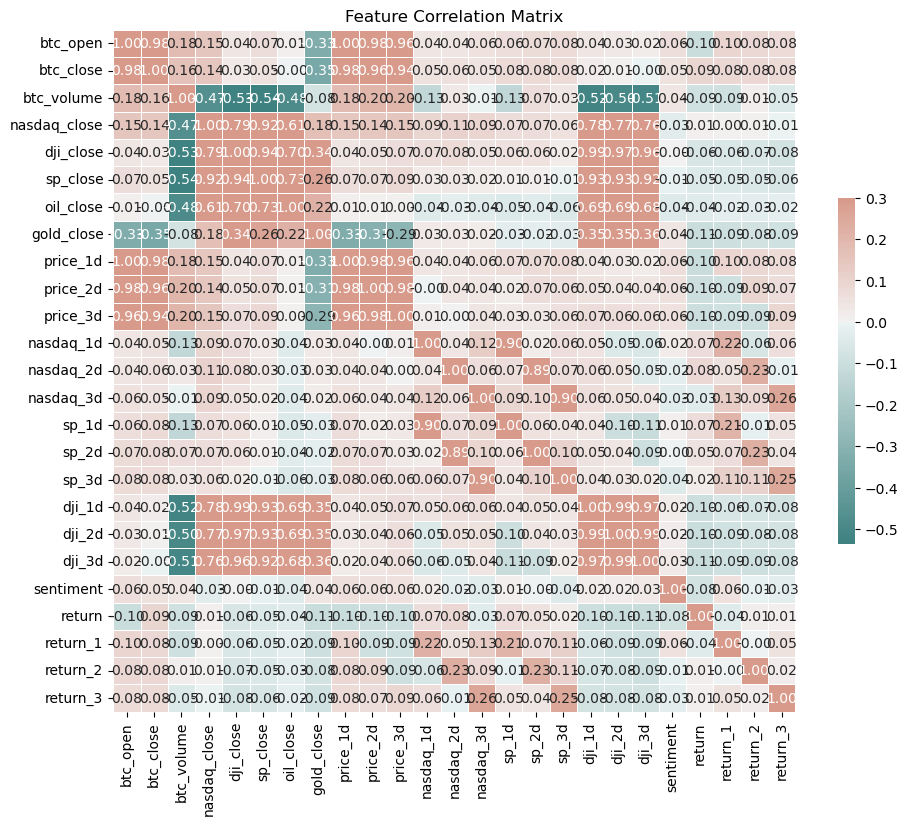

In [78]:
# correlation matrix
corr = data.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(550, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

ax.set_title('Feature Correlation Matrix')
plt.show()

In [79]:
data

,date,btc_open,btc_close,btc_volume,nasdaq_close,dji_close,sp_close,oil_close,gold_close,price_1d,...,sp_3d,dji_1d,dji_2d,dji_3d,tweet,sentiment,return,return_1,return_2,return_3
1,2021-02-05,36931.546875,38144.308594,58598066402,13856.299805,31148.199219,3886.830078,56.849998,1810.900024,36926.066406,...,0.013898,31055.900391,30723.599609,30687.500000,yeah by default engine with least lever arm wo...,0,0.032991,-0.014571,0.055246,0.058834
2,2021-02-06,38138.386719,39266.011719,71326033653,13987.639648,31385.800781,3915.590088,57.970001,1831.900024,38144.308594,...,0.001009,31148.199219,31055.900391,30723.599609,thatdamianjustscratchthe future currency of ea...,1,0.029407,0.032991,-0.014571,0.055246
3,2021-02-07,39250.191406,38903.441406,65500641143,13987.639648,31385.800781,3915.590088,57.970001,1831.900024,39266.011719,...,0.010853,31385.800781,31148.199219,31055.900391,lessons learnedhave you read itgreattime to te...,1,-0.009234,0.029407,0.032991,-0.014571
4,2021-02-08,38886.828125,46196.464844,101467222687,13987.639648,31385.800781,3915.590088,57.970001,1831.900024,38903.441406,...,0.003897,31385.800781,31385.800781,31148.199219,back to work tonighthodl the rainforestswho le...,0,0.187465,-0.009234,0.029407,0.032991
5,2021-02-09,46184.992188,46481.105469,91809846886,14007.700195,31375.800781,3911.229980,58.360001,1835.300049,46196.464844,...,0.007399,31385.800781,31385.800781,31385.800781,this is intended for earth but there may be so...,0,0.006162,0.187465,-0.009234,0.029407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2022-01-21,40699.605469,36457.316406,43011992031,13768.919922,34265.398438,4397.939941,85.139999,1831.800049,40680.417969,...,0.000000,34715.398438,35028.601562,35368.500000,wtfmost people have no ideayeah this saveswhol...,0,-0.103812,-0.025486,-0.014898,0.002960
338,2022-01-25,36654.804688,36954.003906,26428189594,13539.290039,34297.699219,4356.450195,85.599998,1852.699951,36654.328125,...,-0.036482,34364.500000,34364.500000,34364.500000,our biggest limitation with fremont is convinc...,0,0.013624,-0.098969,-0.130976,-0.173340
339,2022-01-26,36950.515625,36852.121094,31324598034,13542.120117,34168.101562,4349.930176,87.349998,1829.900024,36954.003906,...,0.000000,34297.699219,34364.500000,34364.500000,i have trouble understanding any other motivat...,0,-0.002757,0.008176,0.010407,0.035585
340,2022-01-27,36841.878906,37138.234375,25041426629,13352.780273,34160.800781,4326.509766,86.610001,1793.300049,36852.121094,...,0.000000,34168.101562,34297.699219,34364.500000,i am in awe of swedencanadian truckers rulebid...,0,0.007764,-0.002757,0.008176,0.010407


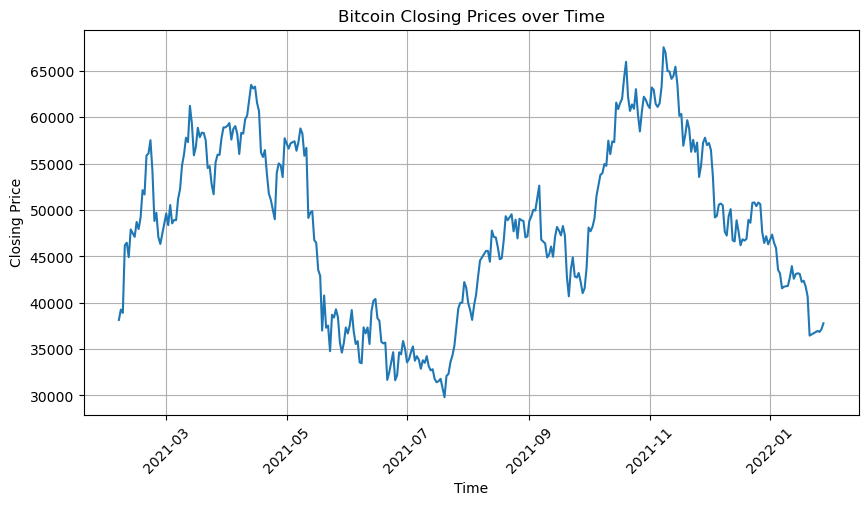

In [80]:
import matplotlib.pyplot as plt

# Convert Unix time to datetime
data['Timestamp'] = pd.to_datetime(data['date'])

# Set the Timestamp column as the index
data.set_index('Timestamp', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['btc_close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [81]:
# Feature selection
# baseline
x = data[['nasdaq_1d','nasdaq_2d', 'nasdaq_3d','sp_1d', 'sp_2d', 'sp_3d', 
          # 'btc_open' highly correlated
          ]]
y = data['return']

# situation 1: add naive bayes sentiment score as one of the predictors
x_1 = data[['nasdaq_1d','nasdaq_2d', 'nasdaq_3d','sp_1d', 'sp_2d', 'sp_3d', 
            'sentiment'
          ]]
# y = data['return']


In [82]:
# baseline
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print('Data Split for baseline done.')

# situation 1: add naive bayes sentiment score as one of the predictors
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_1, y, test_size=0.20, random_state=0)
print('Data Split for situation 1 done.')

Data Split for baseline done.
Data Split for situation 1 done.


In [83]:
# Linear Regression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train) # -------- baseline

linear_model1 = LinearRegression()
linear_model1.fit(x_train1, y_train1) # -------- situation 1



LinearRegression()

In [84]:
# Random Forest
# Defining the parameter grid for tuning the Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 500, 1000],
    'max_depth':[None, 5, 10],
    'min_samples_split': [5, 10]
}

# Initializing GridSearchCV for the baseline model (Random Forest)
grid_search_rf_baseline = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_baseline.fit(x_train, y_train)
# Best parameters and score for the baseline model (Random Forest)
best_params_rf_baseline = grid_search_rf_baseline.best_params_
rf_model = RandomForestRegressor(**best_params_rf_baseline, random_state=0)
rf_model.fit(x_train, y_train)

# Initializing GridSearchCV for situation 1 model (Random Forest)
grid_search_rf_situation1 = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf_situation1.fit(x_train1, y_train1)

# Best parameters and score for situation 1 model (Random Forest)
best_params_rf_situation1 = grid_search_rf_situation1.best_params_
rf_model1 = RandomForestRegressor(**best_params_rf_situation1, random_state=0)
rf_model1.fit(x_train1, y_train1)


RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=1000,
                      random_state=0)

In [85]:
# Prediction for linear model and random forest
# Linear Regression
linear_pred = linear_model.predict(x_test) # -------- baseline
linear_pred1 = linear_model1.predict(x_test1) # -------- situation 1


# Random Forest Regression
rf_pred = rf_model.predict(x_test)
rf_pred1 = rf_model1.predict(x_test1)


In [86]:
# Model evaluation
# Creating a DataFrame to print out the results
model_results = {
    ('Linear Regression', 'Baseline'): {'RMSE': np.sqrt(mean_squared_error(y_test, linear_pred)), 
                                        'R2 Score': r2_score(y_test, linear_pred)},
    ('Linear Regression', 'Situation1'): {'RMSE': np.sqrt(mean_squared_error(y_test1, linear_pred1)), 
                                          'R2 Score': r2_score(y_test1, linear_pred1)},
    ('Random Forest', 'Baseline'): {'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)), 
                                       'R2 Score': r2_score(y_test, rf_pred)},
    ('Random Forest', 'Situation1'): {'RMSE': np.sqrt(mean_squared_error(y_test1, rf_pred1)), 
                                         'R2 Score': r2_score(y_test1, rf_pred1)}
}

# Create a MultiIndex DataFrame
model_results_df = pd.DataFrame(model_results)

# Optional: Round the values for readability
model_results_df_bayes = model_results_df.round(5)

print(model_results_df_bayes)

model_results_df_bayes.to_csv("/Users/huafa/Downloads/model_results_bayes.csv")

         Linear Regression            Random Forest           
                  Baseline Situation1      Baseline Situation1
RMSE               0.03706    0.03787       0.03985    0.03968
R2 Score          -0.00766   -0.05234      -0.16556   -0.15534


In [93]:
model_results_df_bayes.to_csv("/Users/huafa/Downloads/model_results_bayes.csv")

In [87]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [88]:
# Sensitivity analysis: see if time series model performs better than regular ML models
ts_data = stock_bayes[['date', 'btc_close','dji_close','nasdaq_close','oil_close','sp_close','sentiment']]
ts_data['date'] = pd.to_datetime(ts_data['date'])
# change sentiment to dummy variable
ts_data['sentiment'] = ts_data['sentiment'].replace({'negative': 0, 'positive': 1})
ts_data

/var/folders/7q/1lqjtlwj07xd17mwql4bq91h0000gn/T/ipykernel_92867/323083564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data['date'] = pd.to_datetime(ts_data['date'])
/var/folders/7q/1lqjtlwj07xd17mwql4bq91h0000gn/T/ipykernel_92867/323083564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data['sentiment'] = ts_data['sentiment'].replace({'negative': 0, 'positive': 1})


,date,btc_close,dji_close,nasdaq_close,oil_close,sp_close,sentiment
2,2021-02-04,36926.066406,31055.900391,13777.740234,56.230000,3871.739990,0
3,2021-02-05,38144.308594,31148.199219,13856.299805,56.849998,3886.830078,0
4,2021-02-06,39266.011719,31385.800781,13987.639648,57.970001,3915.590088,1
5,2021-02-07,38903.441406,31385.800781,13987.639648,57.970001,3915.590088,1
6,2021-02-08,46196.464844,31385.800781,13987.639648,57.970001,3915.590088,0
...,...,...,...,...,...,...,...
344,2022-01-21,36457.316406,34265.398438,13768.919922,85.139999,4397.939941,0
345,2022-01-25,36954.003906,34297.699219,13539.290039,85.599998,4356.450195,0
346,2022-01-26,36852.121094,34168.101562,13542.120117,87.349998,4349.930176,0
347,2022-01-27,37138.234375,34160.800781,13352.780273,86.610001,4326.509766,0


In [89]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import pandas as pd
import numpy as np


# Prepare data
features = ts_data[['dji_close', 'nasdaq_close', 'oil_close', 'sp_close', 'sentiment']]  # Features
target = ts_data['btc_close']  # Target

# Scaling the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(np.array(target).reshape(-1, 1))

# Splitting the data
train_size = int(len(scaled_features) * 0.8)
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Reshape data for LSTM
train_features = np.reshape(train_features, (train_features.shape[0], train_features.shape[1], 1))
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training the LSTM model
model_lstm.fit(train_features, train_target, epochs=100, batch_size=32, verbose=1)

# Predictions
predictions_lstm = model_lstm.predict(test_features)


Epoch 1/100
9/9 [==============================] - 14s 21ms/step - loss: 0.1971
Epoch 2/100
9/9 [==============================] - 0s 25ms/step - loss: 0.0910
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0841
Epoch 4/100
9/9 [==============================] - 0s 29ms/step - loss: 0.0763
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0750
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0731
Epoch 7/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0723
Epoch 8/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0719
Epoch 9/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0721
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0715
Epoch 11/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0704
Epoch 12/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0704
Epoch 13/100
9/9 [==============================

In [90]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming time series data is sorted by date
ts_data.set_index('date', inplace=True)

# Splitting the data
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data.iloc[:train_size], ts_data.iloc[train_size:]

# ARIMA model
model_arima = ARIMA(train_data['btc_close'], order=(5, 1, 0))  
model_fit_arima = model_arima.fit()
predictions_arima = model_fit_arima.forecast(steps=len(test_data))

# SARIMA model
model_sarima = SARIMAX(train_data['btc_close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  
model_fit_sarima = model_sarima.fit()
predictions_sarima = model_fit_sarima.forecast(steps=len(test_data))


/Users/huafa/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/huafa/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/huafa/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/huafa/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81891D+00    |proj g|=  2.03255D-01

At iterate    5    f=  8.76398D+00    |proj g|=  8.20715D-02

At iterate   10    f=  8.75555D+00    |proj g|=  1.61616D-03

At iterate   15    f=  8.75521D+00    |proj g|=  1.62870D-03

At iterate   20    f=  8.75518D+00    |proj g|=  4.35329D-04

At iterate   25    f=  8.75504D+00    |proj g|=  6.84225D-03

At iterate   30    f=  8.74428D+00    |proj g|=  1.87634D-02

At iterate   35    f=  8.71096D+00    |proj g|=  3.94330D-02

At iterate   40    f=  8.70917D+00    |proj g|=  2.38571D-04

At iterate   45    f=  8.70917D+00    |proj g|=  4.03204D-04

At iterate   50    f=  8.70916D+00    |proj g|=  3.26073D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/huafa/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/huafa/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [91]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(X_train, y_train)

# Predictions
predictions_gb = gb_regressor.predict(X_test)


In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# LSTM Model Evaluation
mse_lstm = mean_squared_error(test_target, predictions_lstm)
mae_lstm = mean_absolute_error(test_target, predictions_lstm)
r2_lstm = r2_score(test_target, predictions_lstm)

# ARIMA and SARIMA Evaluation
mse_arima = mean_squared_error(test_data['btc_close'], predictions_arima)
mae_arima = mean_absolute_error(test_data['btc_close'], predictions_arima)
r2_arima = r2_score(test_data['btc_close'], predictions_arima)

mse_sarima = mean_squared_error(test_data['btc_close'], predictions_sarima)
mae_sarima = mean_absolute_error(test_data['btc_close'], predictions_sarima)
r2_sarima = r2_score(test_data['btc_close'], predictions_sarima)

# Gradient Boosting Regressor Evaluation
mse_gb = mean_squared_error(y_test, predictions_gb)
mae_gb = mean_absolute_error(y_test, predictions_gb)
r2_gb = r2_score(y_test, predictions_gb)

# Print metrics for each model
print("LSTM Model Metrics:")
print(f"MSE: {mse_lstm}, MAE: {mae_lstm}, R2: {r2_lstm}")
print("\nARIMA Model Metrics:")
print(f"MSE: {mse_arima}, MAE: {mae_arima}, R2: {r2_arima}")
print("\nSARIMA Model Metrics:")
print(f"MSE: {mse_sarima}, MAE: {mae_sarima}, R2: {r2_sarima}")
print("\nGradient Boosting Regressor Metrics:")
print(f"MSE: {mse_gb}, MAE: {mae_gb}, R2: {r2_gb}")



LSTM Model Metrics:
MSE: 0.10438070945000734, MAE: 0.2769783682838152, R2: -2.7816584907664503

ARIMA Model Metrics:
MSE: 257380234.77608898, MAE: 14773.383738954271, R2: -5.540112734268504

SARIMA Model Metrics:
MSE: 579970076.1116676, MAE: 21912.11865949832, R2: -13.737222085341624

Gradient Boosting Regressor Metrics:
MSE: 7455440.870434088, MAE: 1920.721326231734, R2: 0.9184221232416008
